In [3]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from IPython.display import Image, display

ImportError: C extension: None not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext' to build the C extensions first.

In [12]:
ta_streets = gpd.read_file("./csv_tables/TA_streets_20240724_031704/Streets.shp")
ta_streets[ta_streets.shemangli == "YIG'AL ALLON"].geometry.length.sum()

2971.942967311407

In [6]:
ta_streets = gpd.read_file("./csv_tables/TA_streets_20240724_031704/Streets.shp")


# loading accidents and BP
accidents_bp_distance = gpd.read_parquet('./csv_tables/accidents_bp_distance_ta.parquet')
accidents_bp_distance.set_geometry('geometry', inplace=True)
pd.display(accidents_bp_distance.crs)
ta_streets = ta_streets.to_crs(epsg=4326)
ta_streets

{"$schema": "https://proj.org/schemas/v0.7/projjson.schema.json", "type": "GeographicCRS", "name": "WGS 84", "datum_ensemble": {"name": "World Geodetic System 1984 ensemble", "members": [{"name": "World Geodetic System 1984 (Transit)"}, {"name": "World Geodetic System 1984 (G730)"}, {"name": "World Geodetic System 1984 (G873)"}, {"name": "World Geodetic System 1984 (G1150)"}, {"name": "World Geodetic System 1984 (G1674)"}, {"name": "World Geodetic System 1984 (G1762)"}, {"name": "World Geodetic System 1984 (G2139)"}], "ellipsoid": {"name": "WGS 84", "semi_major_axis": 6378137, "inverse_flattening": 298.257223563}, "accuracy": "2.0", "id": {"authority": "EPSG", "code": 6326}}, "coordinate_system": {"subtype": "ellipsoidal", "axis": [{"name": "Geodetic latitude", "abbreviation": "Lat", "direction": "north", "unit": "degree"}, {"name": "Geodetic longitude", "abbreviation": "Lon", "direction": "east", "unit": "degree"}]}, "scope": "Horizontal component of 3D system.", "area": "World.", "bb

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
0,1.0,915.0,הרוגי מלכות,HARUGEY MALKHOT,336.0,רחוב,0.0,507-10001,قتل مملكة,100.0,"LINESTRING (34.83219 32.10998, 34.83250 32.10984)"
1,2.0,0.0,0,UKNOWN,0.0,רחוב,3.0,507-10002,None,100.0,"LINESTRING (34.76948 32.08689, 34.77027 32.08679)"
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (34.77889 32.08664, 34.77954 32.08648)"
3,4.0,644.0,אלון יגאל,YIG'AL ALLON,2524.0,רחוב,0.0,507-10004,ألون ييغال,200.0,"LINESTRING (34.79662 32.07734, 34.79675 32.07755)"
4,5.0,634.0,מרגולין,MARGOLIN,2649.0,רחוב,1.0,507-10005,مارغولين,100.0,"LINESTRING (34.79370 32.05846, 34.79455 32.05844)"
...,...,...,...,...,...,...,...,...,...,...,...
8874,9851.0,3007.0,שבטי ישראל,SHIVTEY YISRA'EL,1983.0,רחוב,0.0,507-17843,قبائل إسرائيل,100.0,"LINESTRING (34.75581 32.04727, 34.75568 32.04703)"
8875,9852.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20562,Avinri Yitzhak,100.0,"LINESTRING (34.75387 32.04869, 34.75431 32.048..."
8876,9853.0,3058.0,אבינרי יצחק,AVINERY,2027.0,רחוב,0.0,507-20563,Avinri Yitzhak,100.0,"LINESTRING (34.75506 32.04765, 34.75568 32.047..."
8877,9855.0,3907.0,3907,None,1703.0,רחוב,0.0,507-21960,3907,100.0,"LINESTRING (34.74850 32.04425, 34.74837 32.044..."


In [7]:
ta_streets[(ta_streets.shemangli == "AMSTERDAM") ]

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (34.77889 32.08664, 34.77954 32.08648)"
616,628.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,2.0,507-10749,أمستردام,100.0,"LINESTRING (34.77954 32.08648, 34.78034 32.08629)"
617,629.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10750,أمستردام,100.0,"LINESTRING (34.78034 32.08629, 34.78105 32.08613)"
618,630.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10751,أمستردام,100.0,"LINESTRING (34.77793 32.08687, 34.77889 32.08664)"


In [8]:
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([3.0, 628.0]))]

,oidrechov,krechov,trechov,shemangli,mslamas,tsug,kkivun,UniqueId,shemarvit,kreka,geometry
2,3.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,1.0,507-10003,أمستردام,100.0,"LINESTRING (34.77889 32.08664, 34.77954 32.08648)"
616,628.0,265.0,אמסטרדם,AMSTERDAM,516.0,רחוב,2.0,507-10749,أمستردام,100.0,"LINESTRING (34.77954 32.08648, 34.78034 32.08629)"


In [9]:
ta_streets[ta_streets.shemangli == "AMSTERDAM"].geometry.length.sum()

C:\Users\itay8\AppData\Local\Temp\ipykernel_13952\1512688264.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ta_streets[ta_streets.shemangli == "AMSTERDAM"].geometry.length.sum()


0.0032048806940817255

In [52]:
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].geometry.length

C:\Users\itay8\AppData\Local\Temp\ipykernel_2744\4089811053.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].geometry.length


617    0.000723
dtype: float64

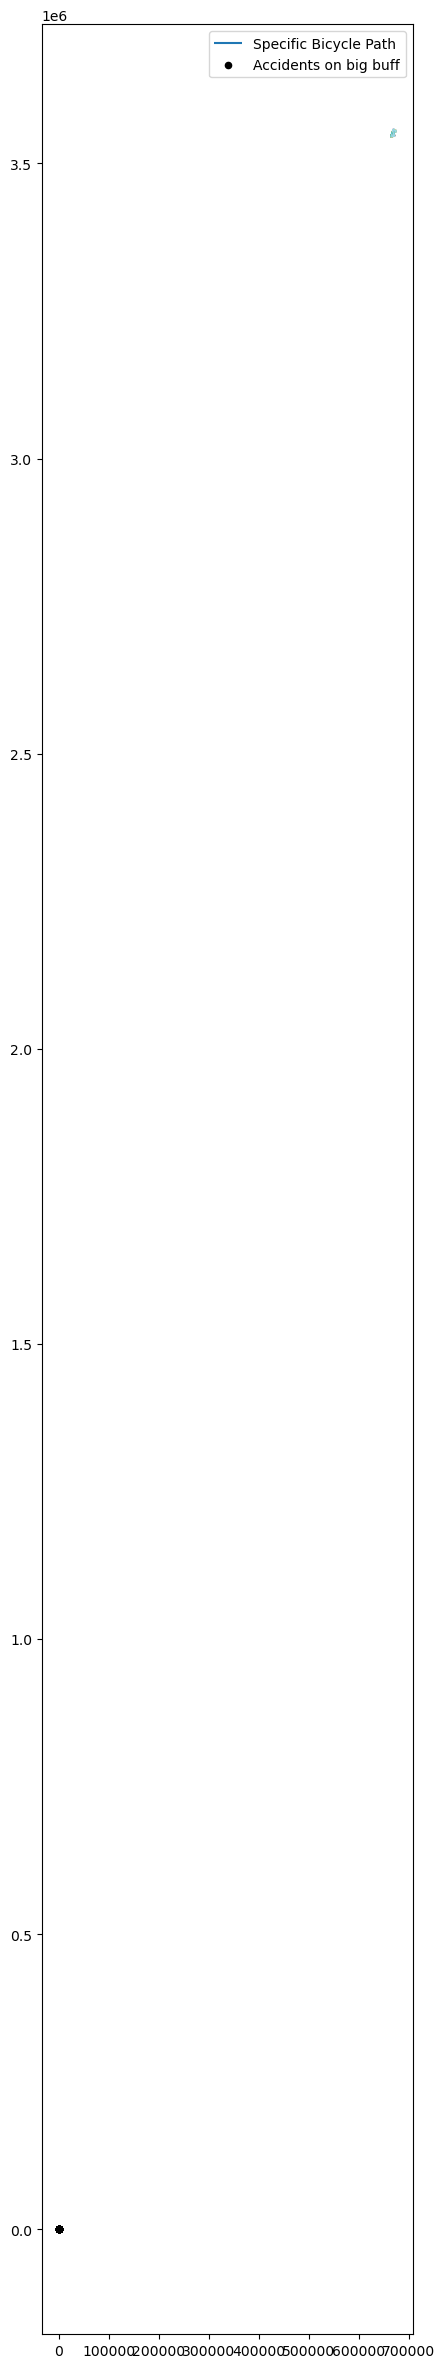

In [15]:

fig, ax = plt.subplots(figsize=(30, 30))

ta_streets.plot(ax=ax, cmap='tab20', legend=True, label='Specific Bicycle Path')
ta_streets[ta_streets.shemangli == "AMSTERDAM"].plot(ax=ax, color='green', linewidth=2)
ta_streets[(ta_streets.shemangli == "AMSTERDAM") & (ta_streets.oidrechov.isin([629.0]))].plot(ax=ax, color='black', linewidth=5)
accidents_bp_distance.plot(ax=ax, color='black', marker='o', label='Accidents on big buff', markersize=20 )
# accidents_bp_distance['poly_geo'].plot(ax=ax, color='blue', label='Specific Bicycle Path')

plt.legend()
plt.show()

In [ ]:
# # Load the Roava
# ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
# ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
# ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')

# # loading accidents and BP
# accidents_bp_distance = gpd.read_parquet('./csv_tables/accidents_bp_distance_ta.parquet')
# accidents_bp_distance.set_geometry('geometry', inplace=True)
# ta_q = ta_q.to_crs(accidents_bp_distance.crs)
# if 'index_left' in accidents_bp_distance.columns:
#     accidents_bp_distance = accidents_bp_distance.rename(columns={'index_left': 'accidents_index_left'})
# if 'index_right' in accidents_bp_distance.columns:
#     accidents_bp_distance = accidents_bp_distance.rename(columns={'index_right': 'accidents_index_right'})

# # loading BP
# bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM/Bicycle Routes.shp")
# bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
#                          'shemmikta', 'miflas', 'create_date', 'geometry']
# bicycle_paths.create_year = bicycle_paths.create_year.fillna(2000).astype(int)
# bicycle_paths
# # changing col names to fit other dataframes 
# bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')

# bicycle_paths['street_name'] = clean_st_names

# bp = bicycle_paths.to_crs(epsg=4326)


# print(accidents_bp_distance.shape, ta_q.shape, bp.shape)
# accidents_bp_distance.crs, ta_q.crs, bp.crs

In [54]:
clean_st_names = []
bp_street_names = pd.read_csv('./csv_tables/bp_street_name_only.csv', index_col=0)
for index, row in bp_street_names.iterrows():
    if isinstance(row['street_name'], float):
        clean_st_names.append('')
    else:
        st_name = row['street_name'].split("מ-")
        clean_st_names.append(st_name[0].strip())


clean_st_names

# Load the Roava
ta_q = gpd.read_file("./csv_tables/TA_Quaters_UTM/Quarters.shp")
ta_q.oidrova = pd.to_numeric(ta_q.oidrova, downcast='integer')
ta_q.krova = pd.to_numeric(ta_q.krova, downcast='integer')

# loading accidents and BP
accidents_bp_distance = gpd.read_parquet('./csv_tables/accidents_bp_distance_ta.parquet')
accidents_bp_distance.set_geometry('geometry', inplace=True)
ta_q = ta_q.to_crs(accidents_bp_distance.crs)
if 'index_left' in accidents_bp_distance.columns:
    accidents_bp_distance = accidents_bp_distance.rename(columns={'index_left': 'accidents_index_left'})
if 'index_right' in accidents_bp_distance.columns:
    accidents_bp_distance = accidents_bp_distance.rename(columns={'index_right': 'accidents_index_right'})

# loading BP
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM/Bicycle Routes.shp")
bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
                         'shemmikta', 'miflas', 'create_date', 'geometry']
bicycle_paths.create_year = bicycle_paths.create_year.fillna(2000).astype(int)
bicycle_paths
# changing col names to fit other dataframes 
bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')

bicycle_paths['street_name'] = clean_st_names

bp = bicycle_paths.to_crs(epsg=4326)


print(accidents_bp_distance.shape, ta_q.shape, bp.shape)
accidents_bp_distance.crs, ta_q.crs, bp.crs

(8435, 167) (9, 5) (858, 11)


(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [58]:
bp[bp.street_name == "אלון יגאל"]

,oid_shvil,msorech,dateimport,width,direction,create_year,shemmikta,miflas,create_date,geometry,street_name
278,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79354 32.06921, 34.79361 32.06920)",אלון יגאל
279,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79342 32.06923, 34.79348 32.06922)",אלון יגאל
280,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79352 32.06965, 34.79340 32.069...",אלון יגאל
281,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79357 32.06981, 34.79371 32.070...",אלון יגאל
282,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79384 32.07029, 34.79393 32.07027)",אלון יגאל
283,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79371 32.07032, 34.79371 32.07032)",אלון יגאל
284,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79371 32.07032, 34.79379 32.07030)",אלון יגאל
285,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79388 32.07092, 34.79377 32.070...",אלון יגאל
286,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79407 32.07158, 34.79406 32.071...",אלון יגאל
287,168,355.92,11/02/2024 00:31:49,3.0,דו סטרי,2020,יגאל אלון 1333 עד השלום,כביש,None,"LINESTRING (34.79430 32.07224, 34.79431 32.072...",אלון יגאל


In [60]:
bp[bp.street_name == "אלון יגאל"].geometry.length.sum()

C:\Users\itay8\AppData\Local\Temp\ipykernel_2744\3652556847.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  bp[bp.street_name == "אלון יגאל"].geometry.length.sum()


0.01369388275375932